In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [197]:
train= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/train.csv')
test= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/test.csv')

train.shape, test.shape

((1460, 81), (1459, 80))

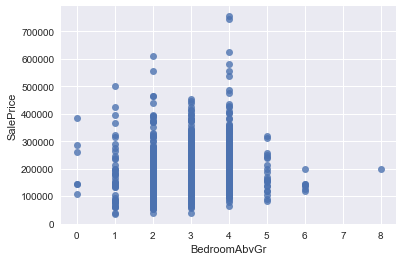

In [196]:
sns.regplot(train['BedroomAbvGr'], train['SalePrice'], fit_reg=False)

##### removing outliers

In [198]:
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<100000)].index, inplace=True)
train.drop(train[(train['TotalBsmtSF']>6000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['1stFlrSF']>4500) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['MasVnrArea']>1400) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['BsmtFinSF1']>5000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['LotFrontage']>300) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<100000)].index, inplace=True)
train.drop(train[(train['BedroomAbvGr']>7) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

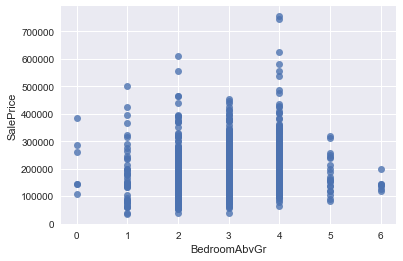

In [199]:
sns.regplot(train['BedroomAbvGr'], train['SalePrice'], fit_reg=False)

#### Updating PoolQC

In [19]:
test['PoolQC'].isnull().sum()

1456

In [166]:
test.loc[960, 'PoolQC']='Fa'
test.loc[1043, 'PoolQC']='Gd'
test.loc[1139, 'PoolQC']='Fa'

In [21]:
test['PoolQC'].isnull().sum()

1453

In [191]:
train['PoolQC'].fillna('None', inplace=True)
test['PoolQC'].fillna('None', inplace=True)

#### Updating MiscFeature

In [22]:
test['MiscFeature'].isnull().sum()

1408

In [167]:
test.loc[1089, 'MiscFeature']='Gar2'

In [31]:
test['MiscFeature'].isnull().sum()

1407

In [168]:
test[test['Id']==2550]['MiscFeature']

1089    Gar2
Name: MiscFeature, dtype: object

In [190]:
train['MiscFeature'].fillna('None', inplace=True)
test['MiscFeature'].fillna('None', inplace=True)

#### Updating FireplaceQu

In [52]:
test['FireplaceQu'].isnull().sum()

730

In [53]:
train['FireplaceQu'].isnull().sum()

690

In [169]:
train['FireplaceQu'].fillna('None', inplace=True)

In [170]:
test['FireplaceQu'].fillna('None', inplace=True)

In [81]:
test['FireplaceQu'].isnull().sum()

0

In [82]:
train['FireplaceQu'].isnull().sum()

0

#### Updating LotFrontage

In [83]:
train['LotFrontage'].isnull().sum()

259

In [84]:
test['LotFrontage'].isnull().sum()

227

In [171]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)

In [172]:
test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)

In [87]:
train['LotFrontage'].isnull().sum()

0

In [88]:
test['LotFrontage'].isnull().sum()

0

#### Updating Garage

In [93]:
train[['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']].isnull().sum()

GarageQual      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
GarageCond      81
GarageType      81
dtype: int64

In [94]:
test[['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']].isnull().sum()

GarageQual      78
GarageFinish    78
GarageYrBlt     78
GarageType      76
GarageCond      78
dtype: int64

In [173]:
train['GarageQual'].fillna('None', inplace=True)
test['GarageQual'].fillna('None', inplace=True)
train['GarageFinish'].fillna('None', inplace=True)
test['GarageFinish'].fillna('None', inplace=True)
train['GarageYrBlt'].fillna('None', inplace=True)
test['GarageYrBlt'].fillna('None', inplace=True)
train['GarageType'].fillna('None', inplace=True)
test['GarageType'].fillna('None', inplace=True)
train['GarageCond'].fillna('None', inplace=True)
test['GarageCond'].fillna('None', inplace=True)

In [107]:
train[['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']].isnull().sum()

GarageQual      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
GarageCond      0
dtype: int64

In [108]:
test[['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']].isnull().sum()

GarageQual      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
GarageCond      0
dtype: int64

In [174]:
test.loc[test['Id']==2577, 'GarageType']='None'

In [111]:
test.loc[test['Id']==2577][['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']]

,GarageQual,GarageFinish,GarageYrBlt,GarageType,GarageCond
1116,None,None,None,None,None


#### Updating BSMT

In [129]:
print(train['BsmtCond'].isnull().sum())
print(test['BsmtCond'].isnull().sum())

37
45


In [175]:
test.loc[test['Id']==2041, 'BsmtCond']

580    NaN
Name: BsmtCond, dtype: object

In [176]:
test.loc[test['Id']==2041, 'BsmtCond']='Gd'

In [132]:
test.loc[test['Id']==2041, 'BsmtCond']

580    Gd
Name: BsmtCond, dtype: object

In [177]:
test.loc[test['Id']==2186, 'BsmtCond']='TA'
test.loc[test['Id']==2525, 'BsmtCond']='TA'

In [134]:
print(train['BsmtCond'].isnull().sum())
print(test['BsmtCond'].isnull().sum())

37
42


In [178]:
train['BsmtCond'].fillna('None', inplace=True)
test['BsmtCond'].fillna('None', inplace=True)

In [136]:
print(train['BsmtCond'].isnull().sum())
print(test['BsmtCond'].isnull().sum())

0
0


In [137]:
#BSMT Exposure

print(train['BsmtExposure'].isnull().sum())
print(test['BsmtExposure'].isnull().sum())

38
44


In [179]:
train['BsmtExposure'].fillna('None', inplace=True)
test['BsmtExposure'].fillna('None', inplace=True)

In [139]:
print(train['BsmtExposure'].isnull().sum())
print(test['BsmtExposure'].isnull().sum())

0
0


In [141]:
#BsmtQual

print(train['BsmtQual'].isnull().sum())
print(test['BsmtQual'].isnull().sum())

37
44


In [180]:
test.loc[test['Id']==2218, 'BsmtQual']='Fa'
test.loc[test['Id']==2219, 'BsmtQual']='TA'

In [143]:
print(train['BsmtQual'].isnull().sum())
print(test['BsmtQual'].isnull().sum())

37
42


In [181]:
train['BsmtQual'].fillna('None', inplace=True)
test['BsmtQual'].fillna('None', inplace=True)

In [145]:
print(train['BsmtQual'].isnull().sum())
print(test['BsmtQual'].isnull().sum())

0
0


In [146]:
#BsmtFinType2

print(train['BsmtFinType2'].isnull().sum())
print(test['BsmtFinType2'].isnull().sum())

38
42


In [182]:
train.loc[train['Id']==333, 'BsmtFinType2']='Unf'

In [148]:
print(train['BsmtFinType2'].isnull().sum())
print(test['BsmtFinType2'].isnull().sum())

37
42


In [183]:
train['BsmtFinType2'].fillna('None', inplace=True)
test['BsmtFinType2'].fillna('None', inplace=True)

In [150]:
print(train['BsmtFinType2'].isnull().sum())
print(test['BsmtFinType2'].isnull().sum())

0
0


In [184]:
#BsmtFinType1
train['BsmtFinType1'].fillna('None', inplace=True)
test['BsmtFinType1'].fillna('None', inplace=True)

In [152]:
print(train['BsmtFinType1'].isnull().sum())
print(test['BsmtFinType1'].isnull().sum())

0
0


In [158]:
#BsmtHalfBath'

print(train['BsmtHalfBath'].isnull().sum())
print(test['BsmtHalfBath'].isnull().sum())

0
0


In [185]:
test['BsmtHalfBath'].fillna(0, inplace=True)

In [155]:
print(train['BsmtHalfBath'].isnull().sum())
print(test['BsmtHalfBath'].isnull().sum())

0
0


In [161]:
print(train['BsmtFullBath'].isnull().sum())
print(test['BsmtFullBath'].isnull().sum())

0
2


In [186]:
test['BsmtFullBath'].fillna(0, inplace=True)

In [163]:
print(train['BsmtFullBath'].isnull().sum())
print(test['BsmtFullBath'].isnull().sum())

0
0


In [187]:
test['BsmtFinSF1'].fillna(0, inplace=True)

test['BsmtFinSF2'].fillna(0, inplace=True)

test['BsmtUnfSF'].fillna(0, inplace=True)

test['TotalBsmtSF'].fillna(0, inplace=True)

#### Updating 'MasVnrType'

In [194]:
train['MasVnrType'].fillna('None', inplace=True)

test['MasVnrType'].fillna('None', inplace=True)

train['MasVnrArea'].fillna(0, inplace=True)

test['MasVnrArea'].fillna(0, inplace=True)

#### Updating MSZoning

In [196]:
test['MSZoning'].fillna(test['MSZoning'].mode, inplace=True)

#### Updating Utilities

In [197]:
test['Utilities'].fillna(test['Utilities'].mode, inplace=True)

##### Updating cars and area

In [198]:
test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)

In [214]:
#FENCE
train['Fence'].fillna('None', inplace=True)
test['Fence'].fillna('None', inplace=True)

In [216]:
#Alley
train['Alley'].fillna('None', inplace=True)
test['Alley'].fillna('None', inplace=True)

In [208]:
train[train['Electrical'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,None,NaN,None,0,5,2008,WD,Normal,167500


In [209]:
train['Electrical'].mode()

0    SBrkr
dtype: object

In [211]:
train['Electrical'].fillna('SBrkr', inplace=True)

In [230]:
test['Functional'].mode()

0    Typ
dtype: object

In [231]:
test['SaleType'].mode()

0    WD
dtype: object

In [232]:
test['Exterior1st'].mode()

0    VinylSd
dtype: object

In [233]:
test['KitchenQual'].mode()

0    TA
dtype: object

In [234]:
test['Exterior2nd'].mode()

0    VinylSd
dtype: object

In [235]:
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)